# Conceptual Explanation of the Deutsch Algorithm Circuit

The **Deutsch Algorithm** is a fundamental example in quantum computing that demonstrates how quantum mechanics can solve certain problems more efficiently than classical algorithms. It utilizes quantum superposition and interference to determine whether a given function is **constant** (outputs the same value for all inputs) or **balanced** (outputs different values for different inputs) with just **one** evaluation of the function.

## 1. Problem Setup

### The Function $f(x)$

- **Input:** A single bit $x$ (either 0 or 1).
- **Output:** A single bit $f(x)$ (either 0 or 1).
- **Promise:** The function is either **constant** (same output for both inputs) or **balanced** (different outputs for each input).

## 2. Circuit Overview

The circuit consists of:

- **Two Qubits:**
  - **Qubit 0:** Represents the input $x$.
  - **Qubit 1:** Used for computing $f(x)$.
- **Quantum Gates:**
  - **Hadamard Gates (H):** Create superpositions.
  - **Oracle $U_f$:** Encodes the function $f(x)$.
  - **Measurement:** Reads the output.

## 3. Step-by-Step Execution

### **Step 1: Initialize the Qubits**

- **Qubit 0:** Start in state $|0\rangle$.
- **Qubit 1:** Start in state $|1\rangle$.

Combined initial state:

$$
|\psi_0\rangle = |0\rangle \otimes |1\rangle = |0\rangle|1\rangle
$$

### **Step 2: Apply Hadamard Gates to Both Qubits**

The Hadamard gate transforms a qubit into a superposition:

- **Hadamard on Qubit 0:**

$$
H|0\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)
$$

- **Hadamard on Qubit 1:**

$$
H|1\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right)
$$

State after Hadamard gates:

$$
\begin{align*}
|\psi_1\rangle &= H|0\rangle \otimes H|1\rangle \\
&= \left( \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) \right) \otimes \left( \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right) \right) \\
&= \frac{1}{2} \left( |0\rangle + |1\rangle \right) \left( |0\rangle - |1\rangle \right)
\end{align*}
$$

This expands to:

$$
|\psi_1\rangle = \frac{1}{2} \left( |0\rangle|0\rangle - |0\rangle|1\rangle + |1\rangle|0\rangle - |1\rangle|1\rangle \right)
$$

### **Step 3: Apply the Oracle $U_f$**

The oracle is a quantum gate that implements the function $f(x)$:

$$
U_f |x\rangle|y\rangle = |x\rangle|y \oplus f(x)\rangle
$$

where $\oplus$ denotes addition modulo 2 (XOR operation).

#### **Effect of the Oracle:**

- **If $f(x) = 0$:** The oracle does nothing to the second qubit.
- **If $f(x) = 1$:** The oracle flips the second qubit (applies an X gate).

#### **Applying $U_f$ to the Superposed State:**

After applying $U_f$, the state becomes:

$$
|\psi_2\rangle = \frac{1}{2} \left( |0\rangle|0 \oplus f(0)\rangle - |0\rangle|1 \oplus f(0)\rangle + |1\rangle|0 \oplus f(1)\rangle - |1\rangle|1 \oplus f(1)\rangle \right)
$$

This accounts for all possible combinations of $x$ and $y$.

### **Step 4: Simplify the State After Oracle**

Due to the XOR operation, the second qubit's state depends on $f(x)$:

- For each $x$, the second qubit's state becomes $|y \oplus f(x)\rangle$.

### **Step 5: Apply Hadamard Gate to the First Qubit**

We apply another Hadamard gate to **Qubit 0** to interfere the amplitudes:

- **Hadamard on Qubit 0:**

$$
H|0\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)
$$

$$
H|1\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right)
$$

Applying $H$ to the first qubit transforms the state to $|\psi_3\rangle$.

### **Step 6: Analyze the Interference**

#### **Case 1: Function is Constant ($f(0) = f(1)$)**

- **Both outputs are the same**, so the oracle applies the same operation for both $x = 0$ and $x = 1$.
- The amplitudes for $|0\rangle$ constructively interfere.
- **Result:** The probability of measuring $|0\rangle$ is 1.

#### **Case 2: Function is Balanced ($f(0) \ne f(1)$)**

- **Outputs are different**, so the oracle applies different operations for $x = 0$ and $x = 1$.
- The amplitudes for $|0\rangle$ destructively interfere.
- **Result:** The probability of measuring $|1\rangle$ is 1.

### **Step 7: Measure the First Qubit**

- **Measurement Outcome $0$:** Indicates the function is **constant**.
- **Measurement Outcome $1$:** Indicates the function is **balanced**.

## 4. Quantum Principles at Work

### **Superposition**

By applying Hadamard gates, the qubits are placed in a superposition of all possible input states simultaneously.

### **Quantum Parallelism**

The oracle processes both input values $x = 0$ and $x = 1$ **at the same time** due to the superposition, effectively evaluating $f(0)$ and $f(1)$ in a single operation.

### **Interference**

The second Hadamard gate on Qubit 0 causes the probability amplitudes of different paths to interfere:

- **Constructive Interference:** When the function is constant, the paths leading to $|0\rangle$ reinforce each other.
- **Destructive Interference:** When the function is balanced, the paths leading to $|0\rangle$ cancel out.

### **Measurement**

Measuring the first qubit collapses the superposition, yielding information about the nature of $f(x)$:

- The measurement result directly tells us whether $f(x)$ is constant or balanced.

## 5. Why the Algorithm Works

The Deutsch Algorithm leverages the unique properties of quantum mechanics:

- **Single Evaluation:** By using superposition and quantum parallelism, the algorithm evaluates both $f(0)$ and $f(1)$ simultaneously.
- **Global Property Extraction:** Through interference, the algorithm extracts a global property (constant or balanced) of the function without knowing individual values.
- **Efficiency:** Classically, determining whether $f(x)$ is constant or balanced requires two evaluations. Quantumly, it requires only one.

## 6. Visualization of the Circuits

The circuits are represented in the code section below.

## 7. Key Takeaways

- **Quantum Advantage:** The algorithm exemplifies how quantum computers can outperform classical ones in specific tasks.
- **Fundamental Concepts:** It introduces essential quantum computing concepts like superposition, interference, and measurement.

# Code

In [1]:
%matplotlib inline

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

from qmiotools.integrations.qiskitqmio import QmioBackend, FakeQmio
from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Oracles

In [3]:
def oracle_constant_0(qc):
    # f(x) = 0, do nothing
    pass

def oracle_constant_1(qc):
    # f(x) = 1, apply X gate to target qubit
    qc.x(1)

def oracle_balanced_identity(qc):
    # f(x) = x, apply CNOT gate
    qc.cx(0,1)

def oracle_balanced_not(qc):
    # f(x) = NOT x, apply CNOT and X gate
    qc.cx(0,1)
    qc.x(1)

List of oracles:

In [4]:
oracles = [
    ('Constant Function f(x)=0', oracle_constant_0),
    ('Constant Function f(x)=1', oracle_constant_1),
    ('Balanced Function f(x)=x', oracle_balanced_identity),
    ('Balanced Function f(x)=NOT x', oracle_balanced_not)
]

## Deutsch Algoritm

In [5]:
def deutsch_algorithm(oracle, barriers=True, measure_all=False):
    # Create a quantum circuit with 2 qubits and 1 or 2 classical bits
    if measure_all:
         qc = QuantumCircuit(2, 2)
    else:
        qc = QuantumCircuit(2, 1)
    
    # Initialize qubits
    qc.x(1)
    
    # Apply Hadamard gates
    qc.h([0, 1])
    
    # Apply the oracle
    oracle(qc)
    
    # Apply Hadamard gate to the first qubit
    qc.h(0)
    
    if barriers:
        qc.barrier()
        
    # Measure the first qubit
    qc.measure(0, 0)
    
    if measure_all:
        qc.measure(1, 1)
    
    return qc

# Executing on a generic emulator without noise: **AerSimulator**

In [6]:
backend = AerSimulator()

## Constant Function f(x)=0

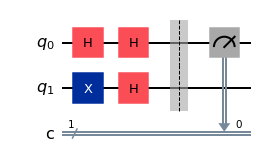

In [7]:
qc = deutsch_algorithm(oracle_constant_0)
qc.draw(output="mpl", idle_wires=False)

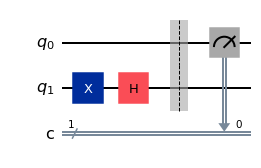

In [8]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'0': 1024}


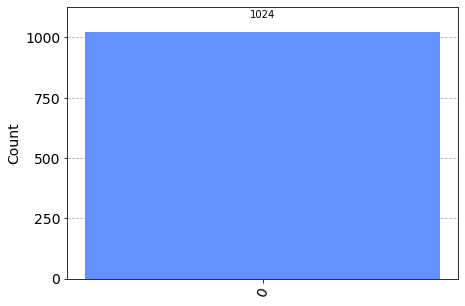

In [9]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Constant Function f(x)=1

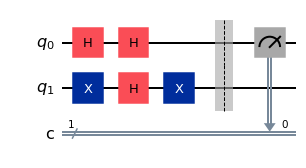

In [10]:
qc = deutsch_algorithm(oracle_constant_1)
qc.draw(output="mpl", idle_wires=False)

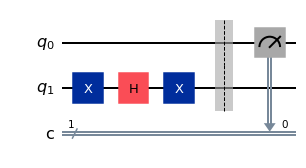

In [11]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'0': 1024}


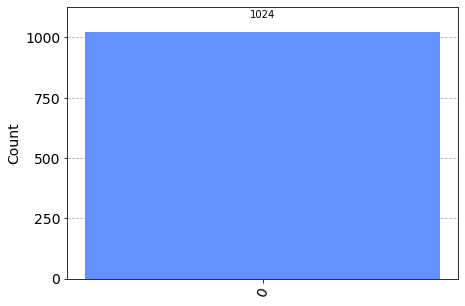

In [12]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Balanced Function f(x)=x

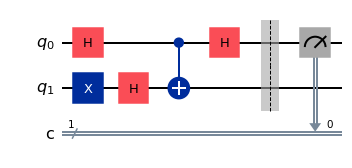

In [13]:
qc = deutsch_algorithm(oracle_balanced_identity)
qc.draw(output="mpl", idle_wires=False)

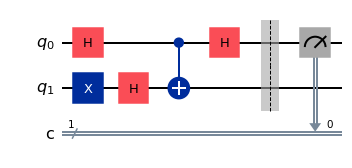

In [14]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'1': 1024}


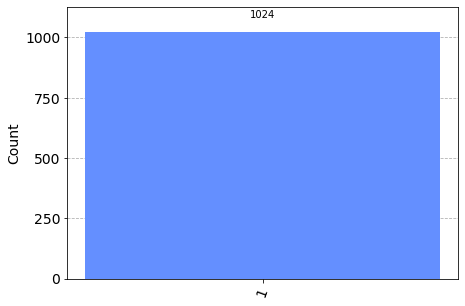

In [15]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Balanced Function f(x)=NOT x

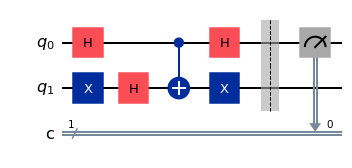

In [16]:
qc = deutsch_algorithm(oracle_balanced_not)
qc.draw(output="mpl", idle_wires=False)

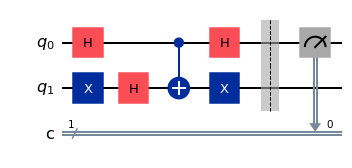

In [17]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'1': 1024}


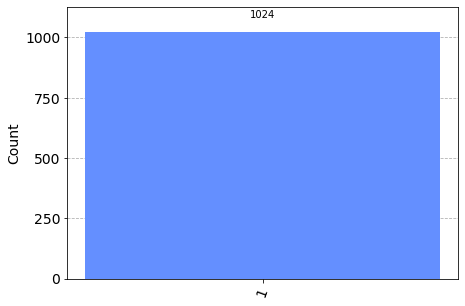

In [18]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

# Executing on Qmio QPU Emulator with noise: **FakeQmio**

In [19]:
backend = FakeQmio(thermal_relaxation=True, gate_error=True, readout_error=True, logging_level=0)

Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_10_24__12_00_02.json


## Constant Function f(x)=0

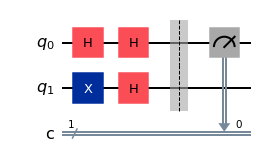

In [20]:
qc = deutsch_algorithm(oracle_constant_0)
qc.draw(output="mpl", idle_wires=False)

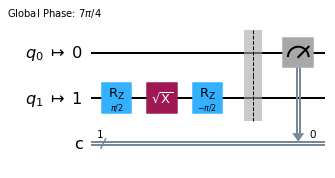

In [21]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'1': 96, '0': 928}


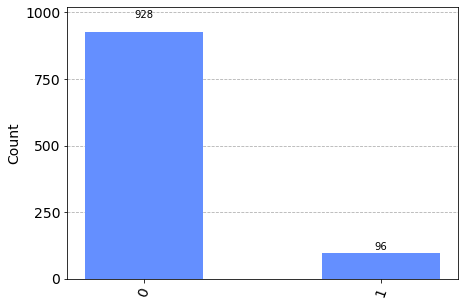

In [22]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Constant Function f(x)=1

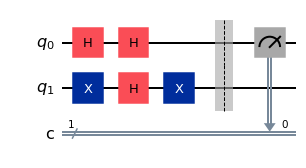

In [23]:
qc = deutsch_algorithm(oracle_constant_1)
qc.draw(output="mpl", idle_wires=False)

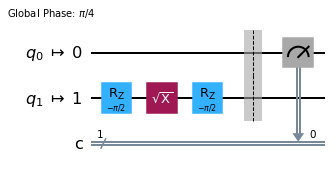

In [24]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'1': 100, '0': 924}


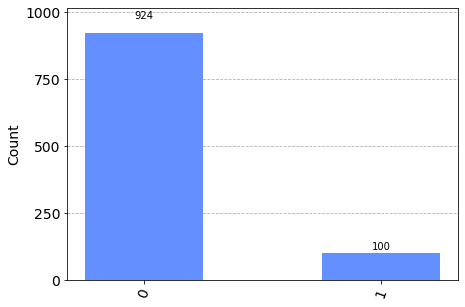

In [25]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Balanced Function f(x)=x

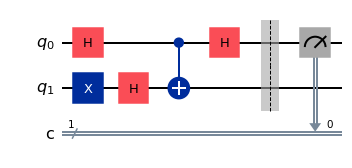

In [26]:
qc = deutsch_algorithm(oracle_balanced_identity)
qc.draw(output="mpl", idle_wires=False)

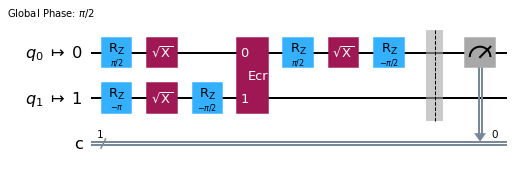

In [27]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'0': 162, '1': 862}


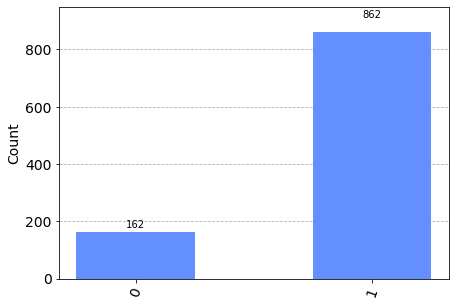

In [28]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Balanced Function f(x)=NOT x

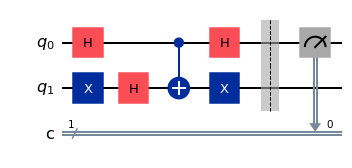

In [29]:
qc = deutsch_algorithm(oracle_balanced_not)
qc.draw(output="mpl", idle_wires=False)

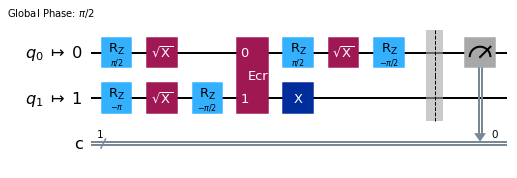

In [30]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'1': 844, '0': 180}


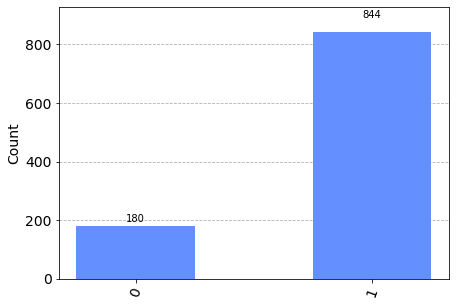

In [31]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

# Executing on QPU: **QmioBackend**

In [32]:
backend = QmioBackend()

Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_10_24__12_00_02.json


## Constant Function f(x)=0

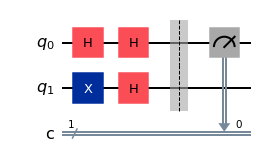

In [33]:
qc = deutsch_algorithm(oracle_constant_0)
qc.draw(output="mpl", idle_wires=False)

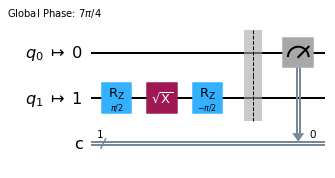

In [34]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'0': 706, '1': 318}


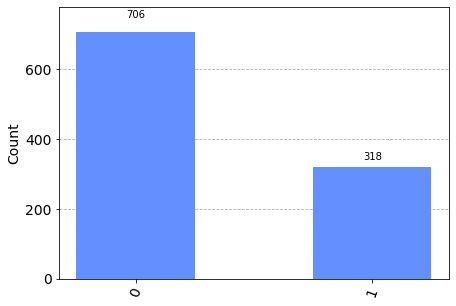

In [35]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Constant Function f(x)=1

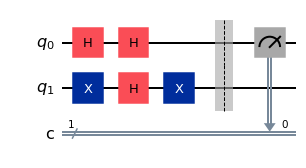

In [36]:
qc = deutsch_algorithm(oracle_constant_1)
qc.draw(output="mpl", idle_wires=False)

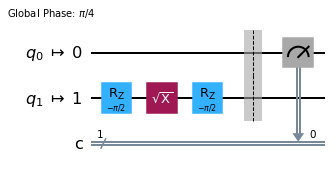

In [37]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'1': 341, '0': 683}


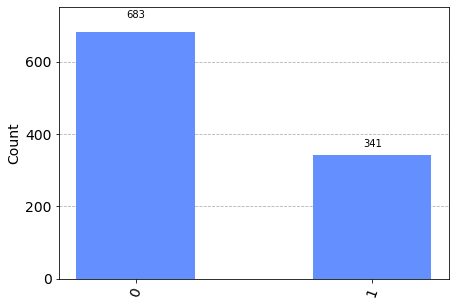

In [38]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Balanced Function f(x)=x

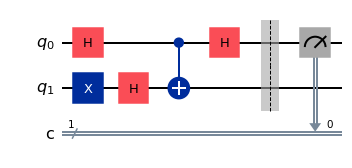

In [39]:
qc = deutsch_algorithm(oracle_balanced_identity)
qc.draw(output="mpl", idle_wires=False)

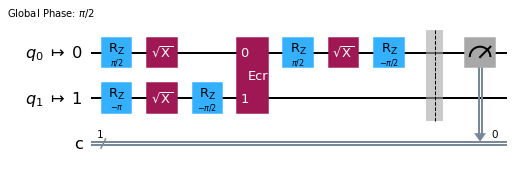

In [40]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'1': 523, '0': 501}


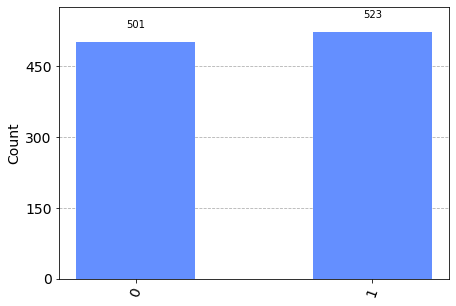

In [41]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

## Balanced Function f(x)=NOT x

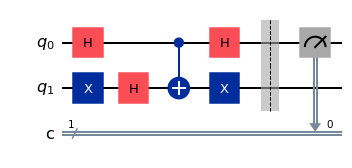

In [42]:
qc = deutsch_algorithm(oracle_balanced_not)
qc.draw(output="mpl", idle_wires=False)

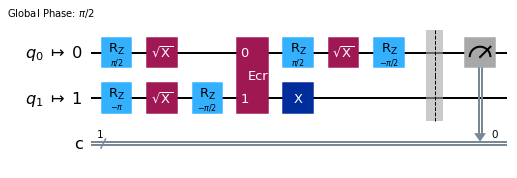

In [43]:
qct = transpile(qc, backend)
qct.draw(output="mpl", idle_wires=False)

Counts: {'1': 563, '0': 461}


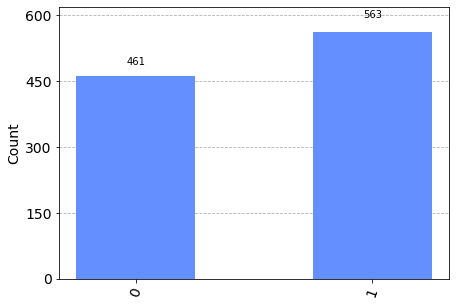

In [44]:
job = backend.run(qct, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

# Executing on QPU with Error Mitigation: **QmioBackend + Error Mitigation**

## Readout Error Mitigation

### Create a readout error mitigator

To run this part you will need the `qiskit-experiments` package, you can install it in our environment:
```
module load gcc/12.3.0 qiskit/1.2.4-python-3.9.9
module load qmio-tools/0.1.3-python-3.9.9
pip install qiskit-experiments
```

In [45]:
backend = QmioBackend()

Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_10_24__12_00_02.json


In [46]:
from qiskit_experiments.library import LocalReadoutError, CorrelatedReadoutError
from qiskit.visualization import circuit_drawer

# We will calculate readout mitigation error for this qubit pair
#qubits = [21, 22]
qubits = [23, 20]

shots = 1024

exp = LocalReadoutError(qubits)
for c in exp.circuits():
    print(c)
exp.analysis.set_options(plot=True)
result = exp.run(backend)

mitigator = result.analysis_results("Local Readout Mitigator").value

         ░ ┌─┐   
   q_0: ─░─┤M├───
         ░ └╥┘┌─┐
   q_1: ─░──╫─┤M├
         ░  ║ └╥┘
meas: 2/════╩══╩═
            0  1 
        ┌───┐ ░ ┌─┐   
   q_0: ┤ X ├─░─┤M├───
        ├───┤ ░ └╥┘┌─┐
   q_1: ┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 


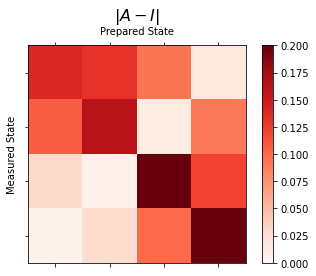

In [47]:
result.figure(0)

In [48]:
for i, m in enumerate(mitigator._mitigation_mats):
    print(f"qubit {qubits[i]} readout mitigation matrix:\n", m)

qubit 23 readout mitigation matrix:
 [[ 1.14569858 -0.17901035]
 [-0.14569858  1.17901035]]
qubit 20 readout mitigation matrix:
 [[ 1.03602204 -0.12120356]
 [-0.03602204  1.12120356]]


### Let's see how good is the mitigator

Let's check how good is the error mitigation running a simple circuit:

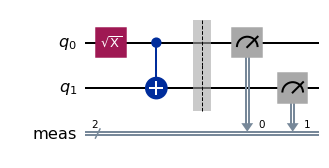

In [49]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw("mpl")

In [50]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.cx(0, 1)
qc.measure_all()
qct = transpile(qc, backend, initial_layout=qubits)
counts = backend.run(qct, shots=shots).result().get_counts()
unmitigated_probs = {label: count / shots for label, count in counts.items()}
mitigated_quasi_probs = mitigator.quasi_probabilities(counts)
mitigated_stddev = mitigated_quasi_probs._stddev_upper_bound
mitigated_probs = (mitigated_quasi_probs.nearest_probability_distribution().binary_probabilities())

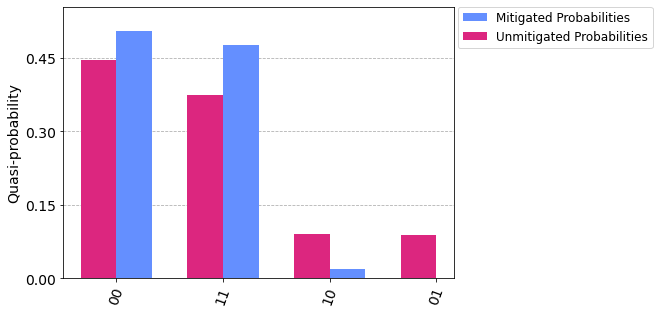

In [51]:
from qiskit.visualization import plot_distribution
legend = ['Mitigated Probabilities', 'Unmitigated Probabilities']
plot_distribution([mitigated_probs, unmitigated_probs], legend=legend, sort="value_desc", bar_labels=False)

## Executing on QPU with Error Mitigation

#### Running all oracles

In [52]:
def run_with_error_mitigation(name, oracle):
    display(Markdown(f"<strong>{name}<strong>"))
    
    qc = deutsch_algorithm(oracle, measure_all=True)
    #print("Circuit")
    #display(qc.draw(output="mpl", idle_wires=False))
    
    qct = transpile(qc, backend, initial_layout=qubits)
    #print("Transpiled circuit")
    #display(qct.draw(output="mpl", idle_wires=False))
    
    job = backend.run(qct, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)

    unmitigated_probs = {label: count / shots for label, count in counts.items()}

    mitigated_quasi_probs = mitigator.quasi_probabilities(counts)
    mitigated_stddev = mitigated_quasi_probs._stddev_upper_bound
    mitigated_probs = (mitigated_quasi_probs.nearest_probability_distribution().binary_probabilities())

    # Plot the histogram
    legend = ['Mitigated Probabilities', 'Unmitigated Probabilities']
    display(plot_distribution([mitigated_probs, unmitigated_probs], legend=legend, sort="value_desc", bar_labels=False))

<strong>Constant Function f(x)=0<strong>

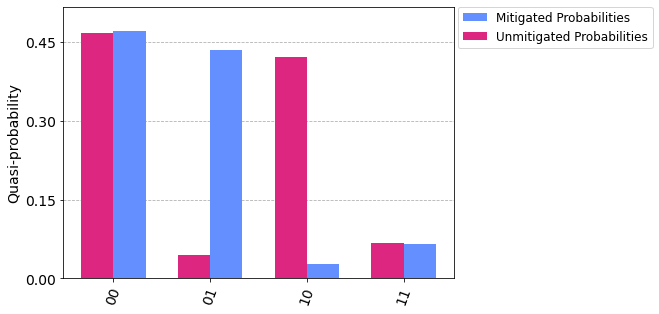

<strong>Constant Function f(x)=1<strong>

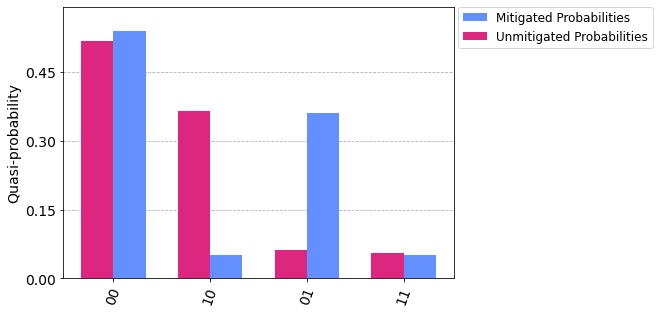

<strong>Balanced Function f(x)=x<strong>

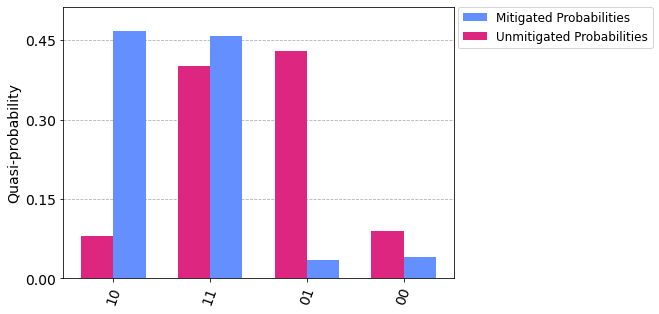

<strong>Balanced Function f(x)=NOT x<strong>

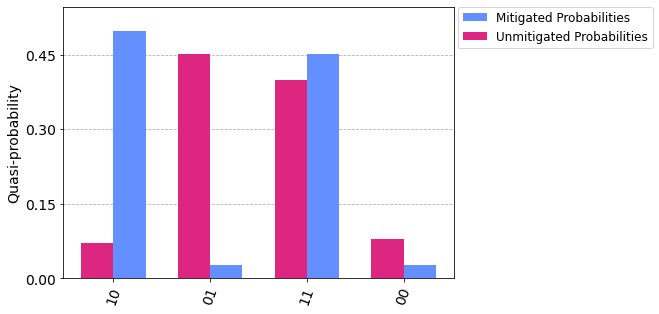

In [53]:
for name, oracle in oracles:
    run_with_error_mitigation(name, oracle)

# Summary

## Executing all circuits on a generic emulator: AerSimulator

In [54]:
backend = AerSimulator()

for description, oracle in oracles:
    print(f"\nTesting {description}")
    qc = deutsch_algorithm(oracle)
    qct = transpile(qc, backend, initial_layout=qubits)
    job = backend.run(qct, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    print("Counts:", counts)


Testing Constant Function f(x)=0
Counts: {'0': 1024}

Testing Constant Function f(x)=1
Counts: {'0': 1024}

Testing Balanced Function f(x)=x
Counts: {'1': 1024}

Testing Balanced Function f(x)=NOT x
Counts: {'1': 1024}


## Executing all circuits on Qmio QPU emulator with noise: FakeQmio

In [55]:
backend = FakeQmio(thermal_relaxation=True, gate_error=True, readout_error=True, logging_level=0)

for description, oracle in oracles:
    print(f"\nTesting {description}")
    qc = deutsch_algorithm(oracle)
    qct = transpile(qc, backend,initial_layout=qubits)
    job = backend.run(qct, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    print("Counts:", counts)

Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_10_24__12_00_02.json

Testing Constant Function f(x)=0
Counts: {'1': 114, '0': 910}

Testing Constant Function f(x)=1
Counts: {'1': 128, '0': 896}

Testing Balanced Function f(x)=x
Counts: {'0': 143, '1': 881}

Testing Balanced Function f(x)=NOT x
Counts: {'0': 131, '1': 893}


## Executing all circuits on Qmio QPU

In [56]:
backend = QmioBackend()

for description, oracle in oracles:
    print(f"\nTesting {description}")
    qc = deutsch_algorithm(oracle)
    qct = transpile(qc, backend,initial_layout=qubits)
    job = backend.run(qct, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    print("Counts:", counts)

Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_10_24__12_00_02.json

Testing Constant Function f(x)=0
Counts: {'0': 893, '1': 131}

Testing Constant Function f(x)=1
Counts: {'0': 914, '1': 110}

Testing Balanced Function f(x)=x
Counts: {'1': 846, '0': 178}

Testing Balanced Function f(x)=NOT x
Counts: {'1': 850, '0': 174}


## Executing all circuits on Qmio QPU with Error Mitigation

Importing calibrations from  /opt/cesga/qmio/hpc/calibrations/2024_10_24__12_00_02.json

Testing Constant Function f(x)=0
Raw counts: {'01': 7, '00': 42, '10': 49, '11': 2}
Unmitigated probabilites: {'01': 0.0068359375, '00': 0.041015625, '10': 0.0478515625, '11': 0.001953125}
Mitigated Probabilities: {'10': 0.07053026275689486, '00': 0.3971647657701072, '01': 0.5323049714729979}


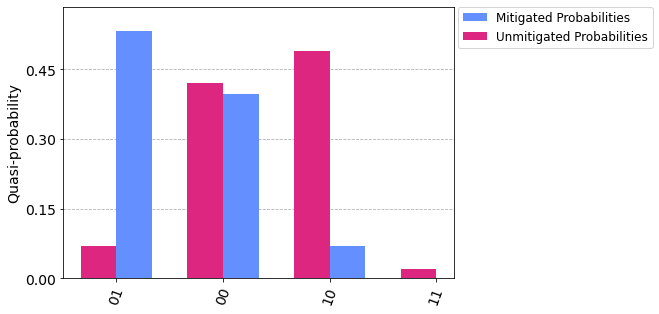


Testing Constant Function f(x)=1
Raw counts: {'00': 52, '10': 41, '01': 6, '11': 1}
Unmitigated probabilites: {'00': 0.05078125, '10': 0.0400390625, '01': 0.005859375, '11': 0.0009765625}
Mitigated Probabilities: {'10': 0.052494460198190804, '01': 0.4181898774874893, '00': 0.5293156623143199}


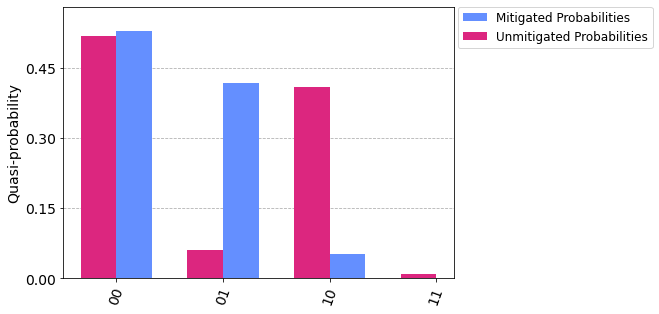


Testing Balanced Function f(x)=x
Raw counts: {'11': 53, '00': 10, '01': 33, '10': 4}
Unmitigated probabilites: {'11': 0.0517578125, '00': 0.009765625, '01': 0.0322265625, '10': 0.00390625}
Mitigated Probabilities: {'00': 0.06490473526731308, '10': 0.3016130422014205, '11': 0.6334822225312665}


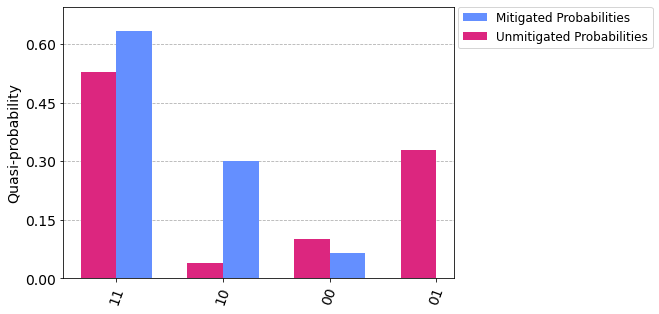


Testing Balanced Function f(x)=NOT x
Raw counts: {'11': 46, '01': 36, '00': 12, '10': 6}
Unmitigated probabilites: {'11': 0.044921875, '01': 0.03515625, '00': 0.01171875, '10': 0.005859375}
Mitigated Probabilities: {'00': 0.08989811345511672, '10': 0.3641507560123076, '11': 0.5459511305325757}


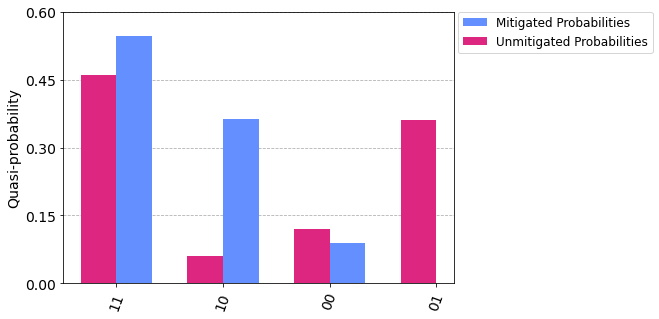

In [57]:
backend = QmioBackend()

for description, oracle in oracles:
    print(f"\nTesting {description}")
    qc = deutsch_algorithm(oracle, measure_all=True)
    qct = transpile(qc, backend, initial_layout=qubits)
    job = backend.run(qct, shots=100)
    result = job.result()
    counts = result.get_counts(qc)
    print("Raw counts:", counts)
    unmitigated_probs = {label: count / shots for label, count in counts.items()}
    print("Unmitigated probabilites:", unmitigated_probs)
    mitigated_quasi_probs = mitigator.quasi_probabilities(counts)
    mitigated_stddev = mitigated_quasi_probs._stddev_upper_bound
    mitigated_probs = (mitigated_quasi_probs.nearest_probability_distribution().binary_probabilities())
    print("Mitigated Probabilities:", mitigated_probs)
    # Plot the histogram
    legend = ['Mitigated Probabilities', 'Unmitigated Probabilities']
    display(plot_distribution([mitigated_probs, unmitigated_probs], legend=legend, sort="value_desc", bar_labels=False))

## Acknowledgements
<center><img src="https://www.cesga.es/wp-content/uploads/2023/10/Cartel-FEDER-CUANTICA_vsetembro23-600x429.png" /></center>